# PCA & LDA on MNIST

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## 1. Train KNN on MNIST Dataset

In [22]:
train_data = datasets.MNIST(root = './data/02/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data/02/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

number of training data :  60000
number of test data :  10000


In [23]:
# 데이터 모양 확인을 위해 dataframe 형태로 변환

feat_cols = ['pixel'+str(i) for i in range(784)]
df_train = pd.DataFrame(train_data.data.reshape(60000,-1).numpy(), columns = feat_cols)
df_test = pd.DataFrame(test_data.data.reshape(10000,-1).numpy(), columns = feat_cols)

df_train.shape, df_test.shape

((60000, 784), (10000, 784))

In [24]:
df_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

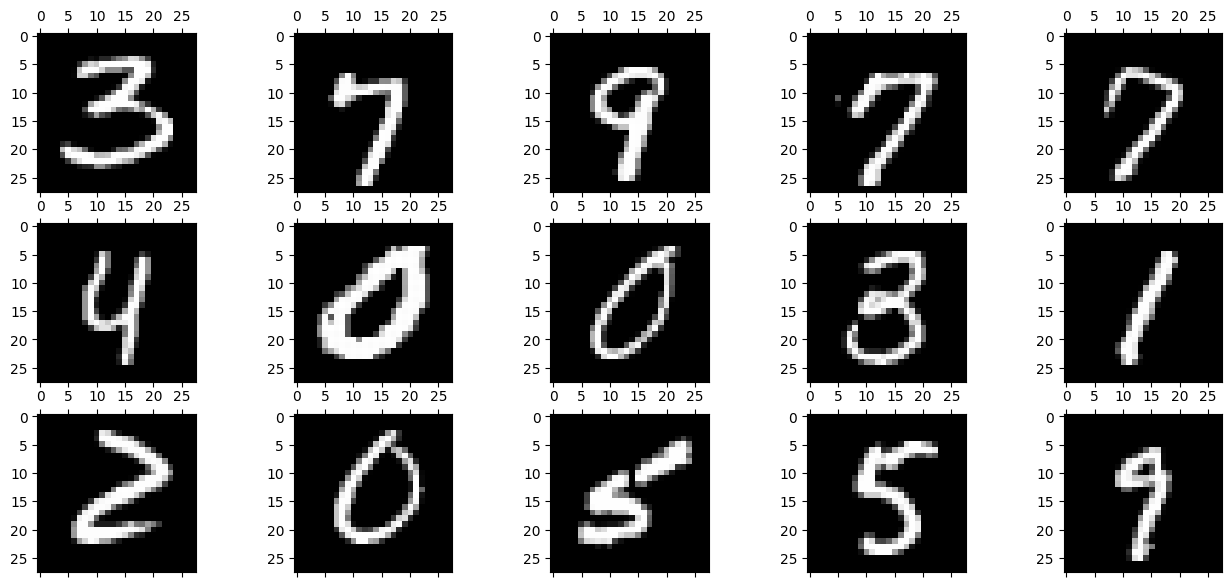

In [25]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df_train.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df_train.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [26]:
# 학습 데이터 준비

import numpy as np

X_train = train_data.data.reshape(60000,-1).numpy()
y_train = train_data.targets.numpy()

X_test = test_data.data.reshape(10000,-1).numpy()
y_test = test_data.targets.numpy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [27]:
# KNN 학습 - Baseline

from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.013666868209838867


In [28]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('Predict time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Predict time :  43.84248995780945
0.9688


## 2. PCA & LDA 적용하기

In [41]:
# PCA 적용

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA()
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = KNeighborsClassifier(n_neighbors= 5)
clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [42]:
# LDA 적용

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

In [43]:
X_train_lda.shape

(60000, 9)

In [44]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995, 0.17849695, 0.10652571, 0.09406712,
       0.06906025, 0.04973746, 0.03429077, 0.0267832 ])

## 3. 결과 비교하기

In [45]:
# PCA 결과
start_time = time.time()
pred = clf_pca.predict(X_test_pca)
print('Predict time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Predict time :  33.22747755050659
0.9688


In [46]:
# LDA 결과
start_time = time.time()
y_pred = lda.predict(X_test)
print('Predict time : ', time.time() - start_time)
print(accuracy_score(y_test, y_pred))

Predict time :  0.06803750991821289
0.873


## 4. PCA & LDA 장단점 정리하기

####장단점을 자유롭게 적어주세요!

- PCA
  - 장점:

        *   주성분은 데이터 분산을 최대한 보존하는 방향으로 선택되기 때문에 정보 손실을 최소화할 수 있다는 장점이 있다.

        *   복잡한 고차원의 데이터를 단순하게 변환시켜주기 때문에 시각화를 보다 더 용이하게 만들어준다.

        *   계산이 비교적 간단하고 빠르며, 여타 머신러닝 알고리즘들과 병용이 가능하다.

        *   고차원 데이터를 간단한 저차원 데이터로 만들어 직관성과 단순성을 제고할 수 있다.

  - 단점:

        *   PCA는 벡터의 선형 변환을 통해서만 데이터를 변환할 수 있기 때문에 데이터가 비선형 구조를 가지고 있는 경우에는 효과적이지 않을 수 있다.

        *   PCA는 데이터의 분산을 기준으로 주성분을 선택하기 때문에 주성분이 데이터 내에서 어떤 의미를 갖고 있는지에 대해 해석하는 과정이 다소 난해하게 느껴질 수 있다.

- LDA
  - 장점:

        *    클래스 간 분산은 최대화하고, 클래스 내 분산은 최소화하여 데이터를 변환하기 때문에, 데이터를 분류에 최적화된 형태로 재구성할 수 있다.

        *    클래스 간 차이가 명확하게 드러나도록 하기 때문에 분류에 유용한 특징을 추출하는데 도움이 된다.

  - 단점:
  
        *    클래스의 수가 많아질 경우, 연산 시간이 상당히 길어질 수 있다.

        *    고차원 데이터에서는 LDA가 과적합될 가능성이 크다.

        *    선형 분리 방식을 토대로 분석이 이루어지기 때문에 비선형적인  방식으로 분리해야 하는 데이터의 경우에는 효과적이지 않을 수 있다.

        *    클래스 간 분산이 작은 경우에는 효과적이지 않을 수 있다.


